In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_excel(r"C:\Users\Sahil Nathani\Desktop\Python and ML Material\Databases\MachineHack\Food Quality\Data_Train.xlsx")
train = train.drop(['ID', 'LicenseNo', 'FacilityID', 'FacilityName', 'Street', 'Geo_Loc', 'Date'], 1)
test = pd.read_excel(r"C:\Users\Sahil Nathani\Desktop\Python and ML Material\Databases\MachineHack\Food Quality\Data_Test.xlsx")
test = test.drop(['ID', 'LicenseNo', 'FacilityID', 'FacilityName', 'Street', 'Geo_Loc', 'Date'], 1)

In [3]:
#2 in number and both same
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(train['City'])
train['City'] = lb.transform(train['City'])
test['City'] = lb.transform(test['City'])
lb.fit(train['State'])
train['State'] = lb.transform(train['State'])
test['State'] = lb.transform(test['State'])

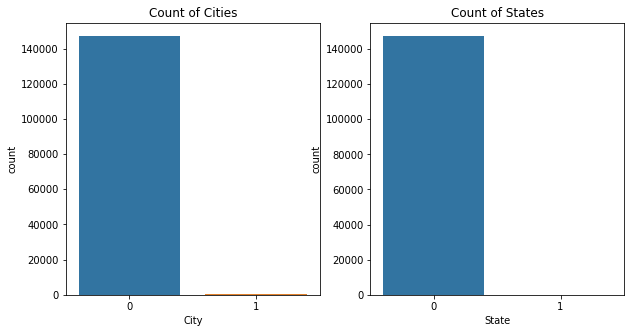

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Count of Cities')
sns.countplot(x='City', data=train)
plt.subplot(1, 2, 2)
plt.title('Count of States')
sns.countplot(x='State', data=train)

In [5]:
train = train.drop(['State', 'City'], 1)
test = test.drop(['State', 'City'], 1)

In [6]:
train.columns

Index(['Type', 'LocationID', 'Reason', 'SectionViolations', 'RiskLevel',
       'Inspection_Results'],
      dtype='object')

In [7]:
#Dropping all the instances having RisklEvel as "Uncertain"
train = train[train['RiskLevel']!='Uncertain']
test = test[test['RiskLevel']!='Uncertain']

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'\n0: FACILITY CHANGED\n1: FAIL\n2: FURTHER INSPECTION REQUIRED\n3: INSPECTION OVERRULED\n4: PASS\n5: PASS(CONDITIONAL)\n6: SHUT-DOWN\n'

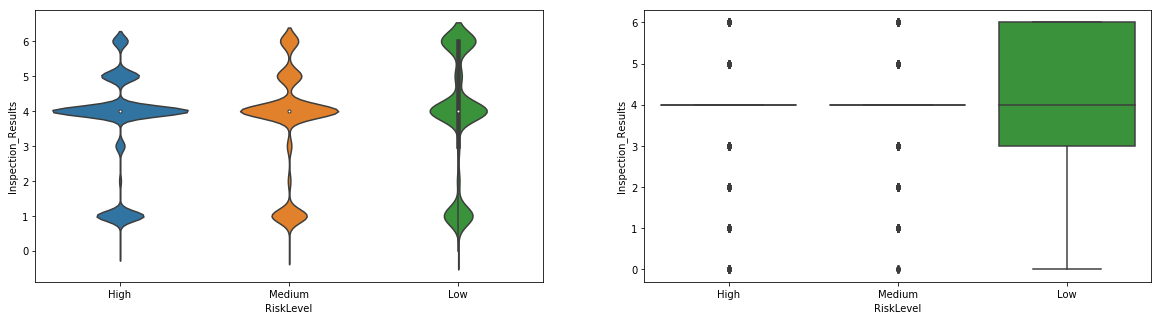

In [8]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='RiskLevel', y='Inspection_Results', data=train)
plt.subplot(1, 2, 2)
sns.boxplot(x='RiskLevel', y='Inspection_Results', data=train)

'''
0: FACILITY CHANGED
1: FAIL
2: FURTHER INSPECTION REQUIRED
3: INSPECTION OVERRULED
4: PASS
5: PASS(CONDITIONAL)
6: SHUT-DOWN
'''

In [9]:
def re_inspect(x):
    if(x.find('RE-INSPECTION')!=-1):
        return 1
    else:
        return 0
    
    
train['isRe'] = [re_inspect(_) for _ in train['Reason']]
test['isRe'] = [re_inspect(_) for _ in test['Reason']]

In [10]:
import re

train['Reason'] = [re.sub('\ RE-INSPECTION$', '', _) for _ in train['Reason']]
test['Reason'] = [re.sub('\ RE-INSPECTION$', '', _) for _ in test['Reason']]

In [11]:
train['Reason'] = train['Reason'].replace('SHORT FORM COMPLAINT', 'COMPLAINT')
test['Reason'] = test['Reason'].replace('SHORT FORM COMPLAINT', 'COMPLAINT')

train['Reason'] = train['Reason'].replace('SHORT FORM FIRE-COMPLAINT', 'FIRE')
test['Reason'] = test['Reason'].replace('SHORT FORM FIRE-COMPLAINT', 'FIRE')

train['Reason'] = train['Reason'].replace('COMPLAINT-FIRE', 'FIRE')
test['Reason'] = test['Reason'].replace('COMPLAINT-FIRE', 'FIRE')

train['Reason'] = train['Reason'].replace('LICENSE-TASK FORCE', 'LICENSE')
test['Reason'] = test['Reason'].replace('LICENSE-TASK FORCE', 'LICENSE')

In [12]:
test['Reason'].unique()

array(['CANVASS', 'LICENSE', 'COMPLAINT', 'RECENT INSPECTION',
       'CONSULTATION', 'FIRE', 'SUSPECTED FOOD POISONING',
       'OUT OF BUSINESS', 'TAG REMOVAL', 'TASK FORCE LIQUOR 1475'],
      dtype=object)

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

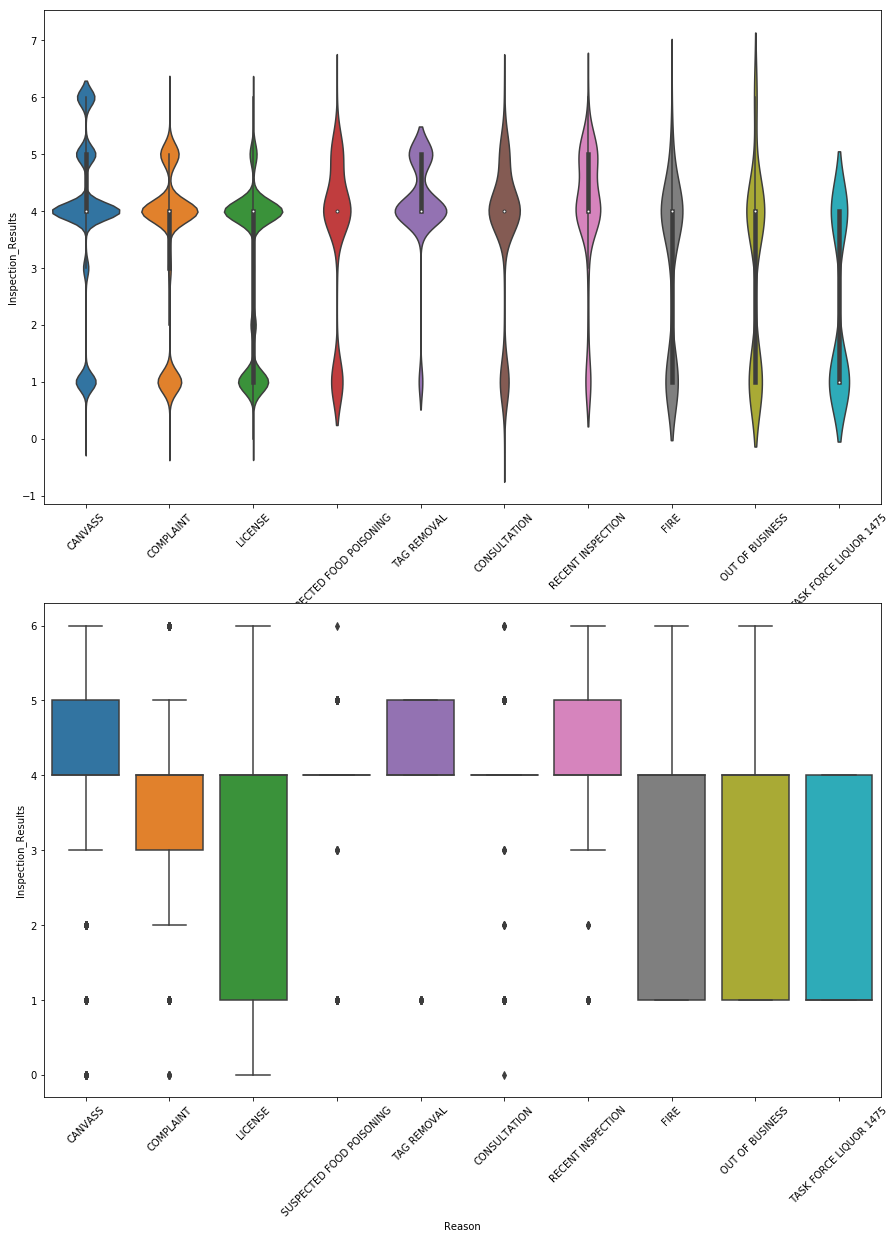

In [13]:
plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 1)
sns.violinplot(x='Reason', y='Inspection_Results', data=train)
plt.xticks(rotation=45)
plt.subplot(2, 1, 2)
sns.boxplot(x='Reason', y='Inspection_Results', data=train)
plt.xticks(rotation=45)

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

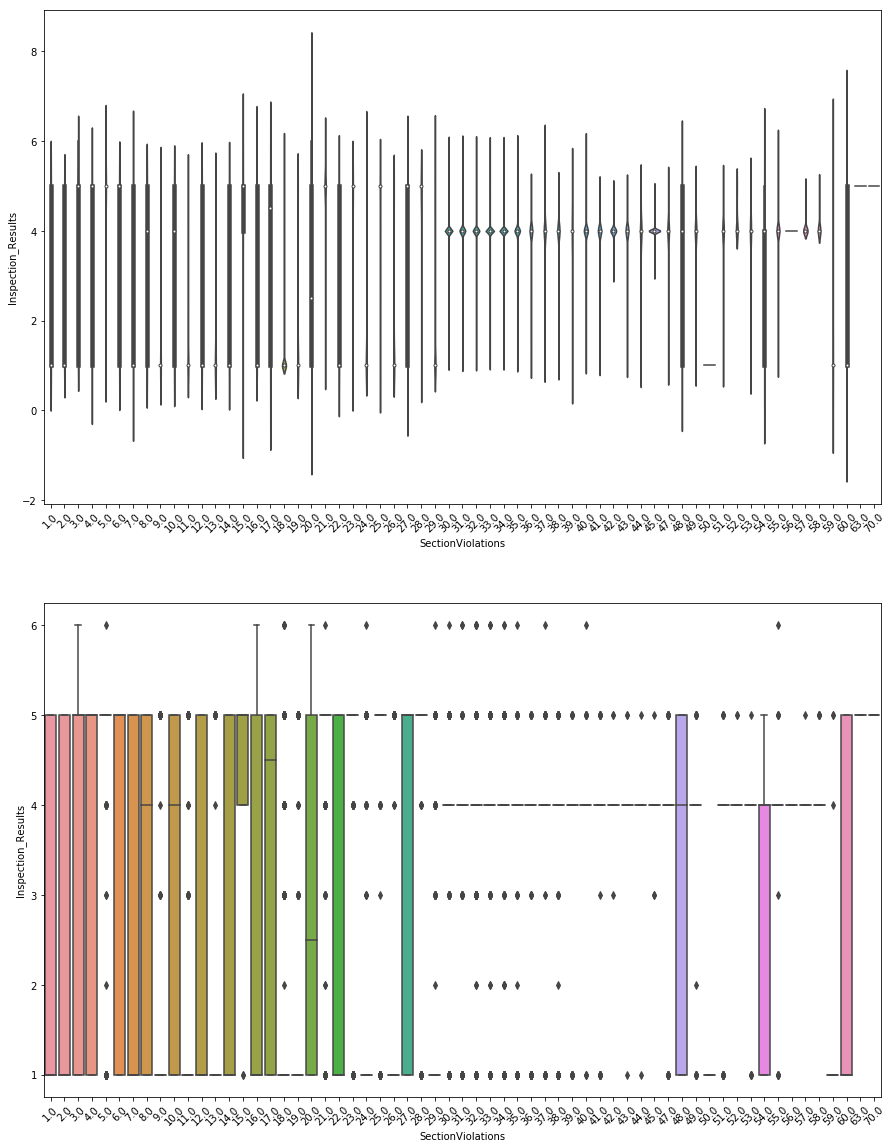

In [14]:
plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 1)
sns.violinplot(x='SectionViolations', y='Inspection_Results', data=train)
plt.xticks(rotation=45)
plt.subplot(2, 1, 2)
sns.boxplot(x='SectionViolations', y='Inspection_Results', data=train)
plt.xticks(rotation=45)

In [15]:
train.mode(), test.mode()

(         Type  LocationID   Reason  SectionViolations RiskLevel  \
 0  RESTAURANT     81859.0  CANVASS               32.0      High   
 
    Inspection_Results  isRe  
 0                   4     0  ,
          Type  LocationID   Reason  SectionViolations RiskLevel  isRe
 0  RESTAURANT     81859.0  CANVASS               32.0      High     0)

In [16]:
train['Type'] = train['Type'].replace(np.nan, 'RESTAURANT')
test['Type'] = test['Type'].replace(np.nan, 'RESTAURANT')

train['LocationID'] = train['LocationID'].replace(np.nan, 81859.0)
test['LocationID'] = test['LocationID'].replace(np.nan, 81859.0)

train['SectionViolations'] = train['SectionViolations'].replace(np.nan, 32.0)
test['SectionViolations'] = test['SectionViolations'].replace(np.nan, 32.0)

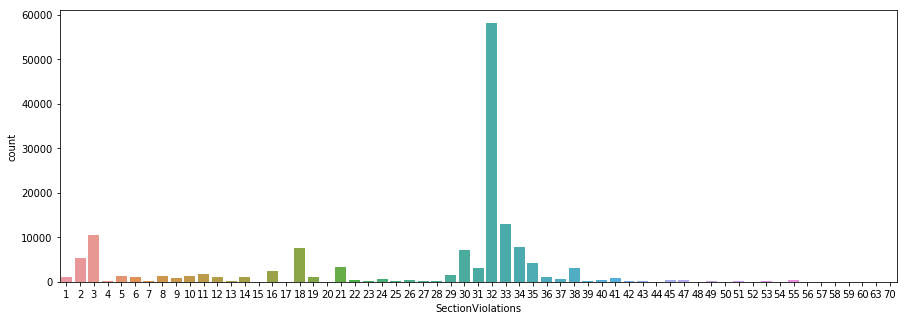

In [17]:
train['SectionViolations'] = [int(_) for _ in train['SectionViolations']]
test['SectionViolations'] = [int(_) for _ in test['SectionViolations']]
plt.figure(figsize=(15, 5))
sns.countplot(x='SectionViolations', data=train)

In [18]:
train.isnull().sum()

Type                  0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Inspection_Results    0
isRe                  0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

#train['Type'] = lb.fit_transform(train['Type'])
#test['Type'] = lb.fit_transform(test['Type'])

train = train.drop(['LocationID', 'Type'], 1)
test = test.drop(['LocationID', 'Type'], 1)

#lb.fit(train['LocationID'])
#train['LocationID'] = lb.fit_transform(train['LocationID'])
#test['LocationID'] = lb.fit_transform(test['LocationID'])

lb.fit(train['RiskLevel'])
train['RiskLevel'] = lb.transform(train['RiskLevel'])
test['RiskLevel'] = lb.transform(test['RiskLevel'])

train['SectionViolations'] = lb.fit_transform(train['SectionViolations'])
test['SectionViolations'] = lb.fit_transform(test['SectionViolations'])

lb.fit(train['Reason'])
train['Reason'] = lb.transform(train['Reason'])
test['Reason'] = lb.transform(test['Reason'])

In [20]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x = np.array(train.drop(['Inspection_Results'], axis=1))
y = np.array(train['Inspection_Results'])
y_pred = np.array(test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

reg = [RandomForestClassifier(n_estimators=200), BaggingClassifier(), AdaBoostClassifier(), 
       DecisionTreeClassifier(splitter='random', criterion='entropy'),
       SVC(), KNeighborsClassifier(n_neighbors=5)]
name = ['randomForest', 'bagging', 'adaBoost', 'decisionTree', 'svc', 'knn']

for n, r in zip(name, reg):
    r.fit(x_train, y_train)
    score = r.score(x_test, y_test)
    '''
    if n=='randomForest':
        result = r.predict(y_pred)
        result = [int(each) for each in result]
        out_data = pd.DataFrame(result)
        out_data.columns = ['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED', 'INSPECTION OVERRULED', 'PASS',
                            'PASS(CONDITIONAL)', 'SHUT-DOWN']
        out_data.to_excel('Submission_songs_popularity.xlsx', header=True)
    '''
    print('Accuracy by ', n, ' is', score*100)

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy by  randomForest  is 79.23690011870443
Accuracy by  bagging  is 79.21655078853654
Accuracy by  adaBoost  is 71.03951161607597
Accuracy by  decisionTree  is 79.24029167373241
Accuracy by  svc  is 79.03340681702561
Accuracy by  knn  is 78.20247583517043
